___

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [51]:
df = pd.read_csv("insurance_encoded.csv")

In [52]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


___
**Understanding the dataset (EDA)**

In [53]:
# checking the shape of the dataframe

df.shape

(1338, 7)

In [54]:
# find the datatypes of the dataframe

df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [55]:
# info() function could help us look deeper into analyzing the dataframe
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [56]:
# though there is no missing values as we have seen by info() function but lets check it with isnull()

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [57]:
# checking for duplicates values

df.duplicated().sum()

np.int64(1)

In [58]:
# there is one duplicates so we have to drop that value

df.drop_duplicates(inplace=True)

In [59]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1,10600.54830
1334,18,1,31.920,0,0,0,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


In [60]:
# getting the statistical summary of the dataframe usng describe()

df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.495138,30.663452,1.095737,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


___

**Modeling a Linear Regression Model on Age and Charges**

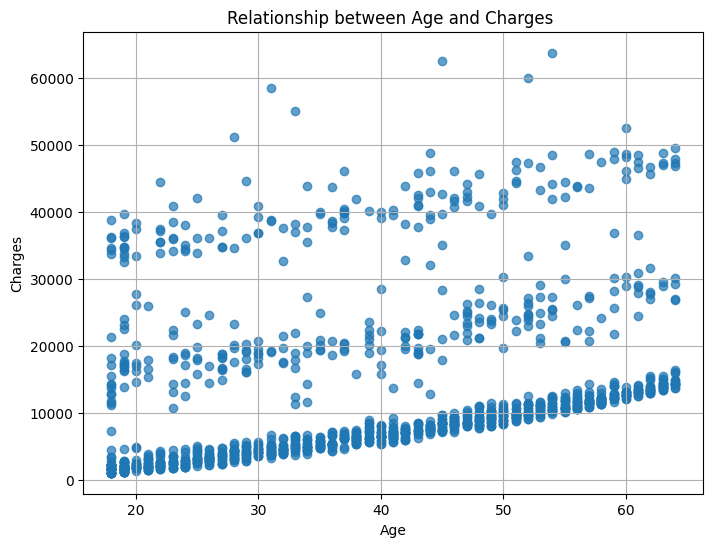

In [61]:
# checking the relationship b/w age and chargers using swarmplot
plt.figure(figsize=(8,6))
plt.scatter(x=df['age'],y=df['charges'],alpha=0.7)
plt.title("Relationship between Age and Charges ")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.grid(True)
plt.show()

In [62]:
# data for model
X = df[["age"]] # has to be 2d data
y = df["charges"]

# spliting data to test and train
X_train, X_test, y_train,y_test = train_test_split(X,y , test_size=0.2, random_state=42)


# modeling it 
model = LinearRegression()
model.fit(X_train,y_train)

# predicted values 
y_predict = model.predict(X_test)

# measuring performance

mse = mean_squared_error(y_test,y_predict)
r2 = r2_score(y_test,y_predict)

print(f"\nModel Coefficients: ")
print(f"Intercept : {model.intercept_}")
print(f"Coefficient : {model.coef_}")

print("\nModel Performance : ")
print(f"nMean Squared Error : {mse:.2f}")
print(f"R2_score : {r2:.2f}")


Model Coefficients: 
Intercept : 3534.091733071058
Coefficient : [242.2581519]

Model Performance : 
nMean Squared Error : 166275348.23
R2_score : 0.10


**Interpretation**

- Intercept : (3534.091733071058) this mean when X (age) is 0 y(charges) is 3534.091 this is the starting point
- Coefficient : (242.25) This mean that for 1 unit change in X(age) there is 242.35 unit change in y(charges)

- MSE (166275348.23) : if we take the root of mse or RMSE the answer will be $12,895 so this mean our prediction might be off by $12,895
- R2_score (0.10) : This mean only 10% of change in changes can be attributes to Age

Visualizing the result fo the regression


In [63]:
# individual prediction
predict_it = 64

print(f"Predict Value for {predict_it} : {model.predict([[predict_it]])}")

Predict Value for 64 : [19038.61345475]


c:\Users\Khattak\.conda\envs\uniai\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


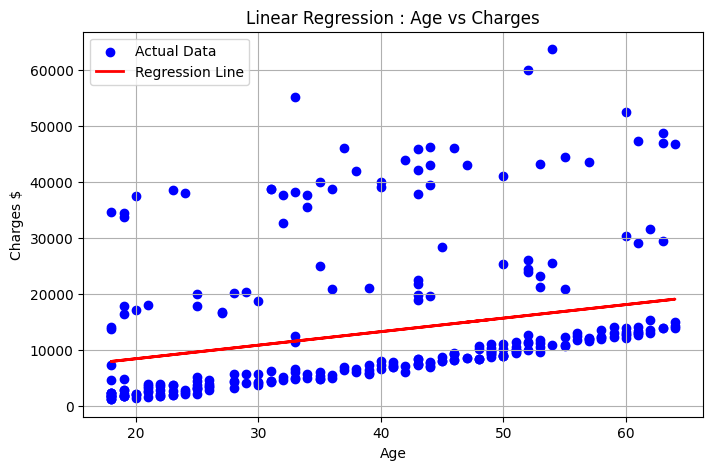

In [64]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_predict, color='red', linewidth=2, label='Regression Line')

plt.title("Linear Regression : Age vs Charges")
plt.xlabel("Age")
plt.ylabel("Charges $")
plt.legend()
plt.grid(True)
plt.show()

___
**Modeling a Linear Regression Model on BMI and charges**

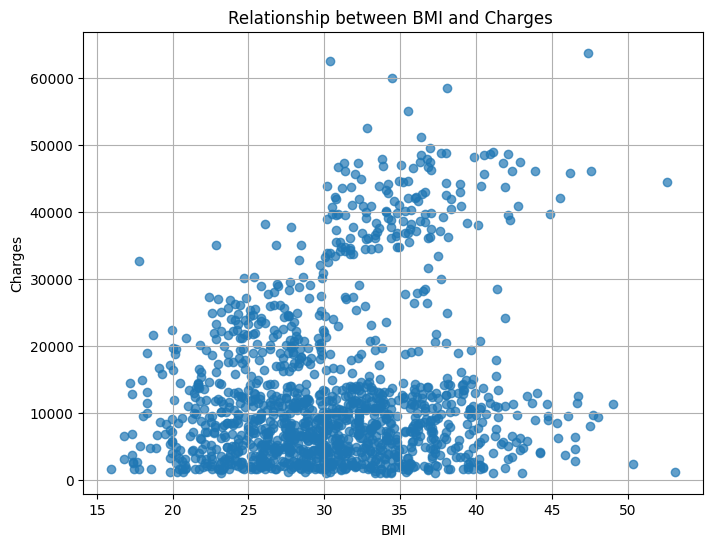

In [65]:
# checking the relationship b/w bmi and chargers using swarmplot
plt.figure(figsize=(8,6))
plt.scatter(x=df['bmi'],y=df['charges'],alpha=0.7)
plt.title("Relationship between BMI and Charges ")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.grid(True)
plt.show()

In [66]:
# data for model
X = df[["bmi"]] # has to be 2d data
y = df["charges"]

# spliting data to test and train
X_train, X_test, y_train,y_test = train_test_split(X,y , test_size=0.2, random_state=42)


# modeling it 
model = LinearRegression()
model.fit(X_train,y_train)

# predicted values 
y_predict = model.predict(X_test)

# measuring performance

mse = mean_squared_error(y_test,y_predict)
r2 = r2_score(y_test,y_predict)

print(f"\nModel Coefficients: ")
print(f"Intercept : {model.intercept_}")
print(f"Coefficient : {model.coef_}")

print("\nModel Performance : ")
print(f"nMean Squared Error : {mse:.2f}")
print(f"R2_score : {r2:.2f}")


Model Coefficients: 
Intercept : 2488.571161649981
Coefficient : [345.16978692]

Model Performance : 
nMean Squared Error : 174251720.52
R2_score : 0.05


**Interpretation**

- Intercept : (2488.571161649981) this mean when X (BMI) is 0 y(charges) is 2488.57 this is the starting point
- Coefficient : (345.16) This mean that for 1 unit change in X(BMI) there is 345.16 unit change in y(charges)

- MSE (174251720.52) : if we take the root of mse or RMSE the answer will be $13200.44 so this mean our prediction might be off by $12,895
- R2_score (0.05) : This mean only 5% of change in charges can be attributes to BMI

In [67]:
# predicting an individual vlaue
predict_it = 33.8

print(f"Predict Value for {predict_it} : {model.predict([[predict_it]])}")

Predict Value for 33.8 : [14155.30995954]


c:\Users\Khattak\.conda\envs\uniai\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


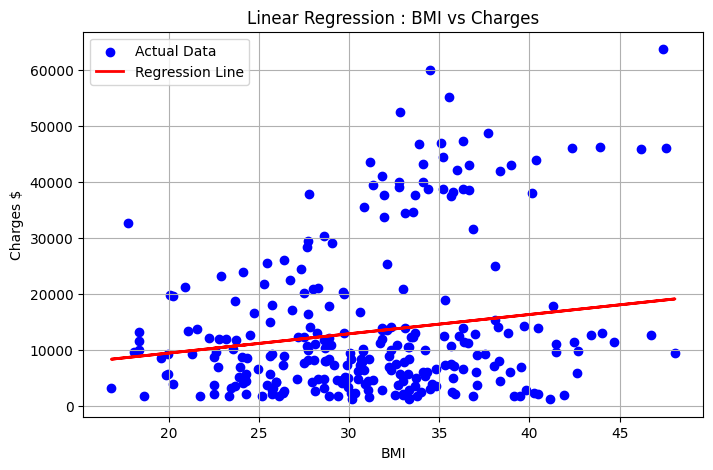

In [68]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_predict, color='red', linewidth=2, label='Regression Line')

plt.title("Linear Regression : BMI vs Charges")
plt.xlabel("BMI")
plt.ylabel("Charges $")
plt.legend()
plt.grid(True)
plt.show()

___
**Performing Multiple linear Regression On Charges (dependent Column)**

In [69]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='str')

In [70]:
# data for model
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']] # has to be 2d data
y = df["charges"]

# spliting data to test and train
X_train, X_test, y_train,y_test = train_test_split(X,y , test_size=0.2, random_state=42)


# modeling it 
model = LinearRegression()
model.fit(X_train,y_train)

# predicted values 
y_predict = model.predict(X_test)

# measuring performance

mse = mean_squared_error(y_test,y_predict)
r2 = r2_score(y_test,y_predict)

print(f"\nModel Coefficients: ")
print(f"Intercept : {model.intercept_}")
print(f"Coefficient : {model.coef_}")

print("\nModel Performance : ")
print(f"nMean Squared Error : {mse:.2f}")
print(f"R2_score : {r2:.2f}")


Model Coefficients: 
Intercept : -11147.38195088983
Coefficient : [  248.76407134    99.69539417   312.60904469   534.12087654
 23052.15275173  -237.62514748]

Model Performance : 
nMean Squared Error : 35493102.61
R2_score : 0.81


**Interpretation**

- Intercept : (-11147.38195088983) this mean when X(all the other variables) is 0 y(charges) is -11147.38 this is the starting point
- Coefficient :  This mean that for 1 unit change in X(BMI) there is 345.16 unit change in y(charges)
    - X₁(age) (248.76): for one unit change in age attributes to 248.76 change in charges

    - X₂(sex) (99.69): for change in gender there is a charges change of 99.69 (men must be doomed again)

    - X₃(bmi) (312.60): for change in bmi change in charges is 312.60

    - X₄ (childern)(534.12): for childern if increase in childern increase in charges by 534.60

    - X₅(smoker) (23,052.15): for smoker the chages can change by 23,052

    - X₆(region) (-237.62): for change in region the charges can change by -237
- MSE (35493102.61) : if we take the root of mse or RMSE the answer will be $5957.608 so this mean our prediction might be off by 5957.608
- R2_score (0.81) : This mean only 81% of change in charges can be attributd to X(all the other columns)

In [77]:
# predicting for individual value
predict_it = [20,0,30.2,1,2,2]

print(f"Predict Value for {predict_it} : {model.predict([predict_it])}")

Predict Value for [20, 0, 30.2, 1, 2, 2] : [49431.86871059]


c:\Users\Khattak\.conda\envs\uniai\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


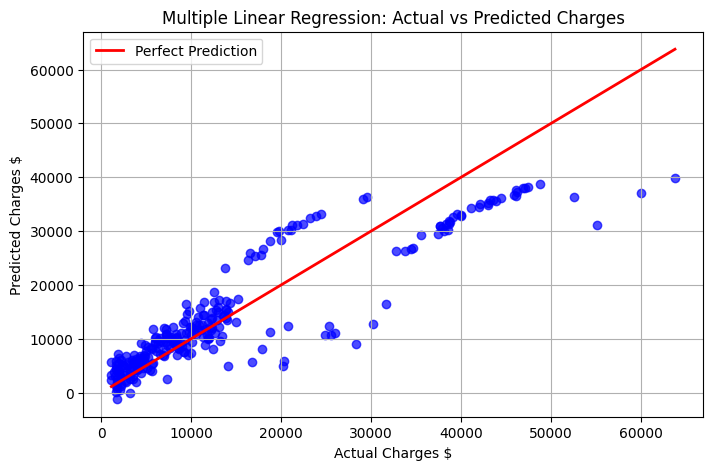

In [ ]:
# For multiple linear regression, we can create a scatter plot of actual vs predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_predict, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],color="red", linewidth=2, label='Perfect Prediction')

plt.title("Multiple Linear Regression: Actual vs Predicted Charges")
plt.xlabel("Actual Charges $")
plt.ylabel("Predicted Charges $")
plt.legend()
plt.grid(True)
plt.show()

___